<a href="https://colab.research.google.com/github/crimama/Bigdata_course/blob/Bigdata_course/12_2_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D2%EC%9D%BC%EC%B0%A8_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
생선, 오렌지 데이터들을 이용해 적용 해보기 

알고리즘 순서 
1. 알고리즘 익히기 
2. 네개의 전처리 데이터 셋(train, test) #데이터 셋을 어떻게 만드는지, 결측치, 이상치를 어떻게 처리하는 지가 중요 
3. fit, score
4. predict #예측된 결과들의 성능이 얼마가 나왔는지 중요 

In [ ]:
데이터를 훈련 데이터와 테스트 데이터로 나눠야 함 
- 보통 20 ~30%정도로 테스트 데이터로 사용 
- 나머지를 훈련 데이터로 사용 

샘플의 편향성 
- 훈련 데이터를 단순하게 자르게 되면 값이 한쪽으로 편향될 수 있음 
- 편향되지 않게 적절하게 데이터를 자르는 것이 중요 함 
- 시계열은 연속적이고 반복되는 패턴이 있기 때문에 큰 문제가 되지 않음 
- 하지만 이미지 인식 등의 데이터들은 문제가 된다 

테스트 데이터 
- 테스트 데이터는 마지막에 하는 것이 모델의 성능을 높이는데 더 도움이 된다 
- 중간에 테스트를 할 경우 모델은 테스트 데이터를 학습하게 되어 나중에 성능이 낮어질 수 있다

데이터 -> 훈련 데이터(80%), 테스트 데이터(20%), 검증 데이터 



In [ ]:
데이터 나누기
- train_input, train_target
- test_input, train_target

In [ ]:
import numpy as np 
import pandas as pd 

In [ ]:
df = pd.read_csv('Fish.csv')
df1 = np.array(df)

In [ ]:
df[3]
df[0:5,]
df[11:16,]
df[-5:,]

array([['Smelt', 12.2, 11.5, 12.2, 13.4, 2.0904, 1.3936],
       ['Smelt', 13.4, 11.7, 12.4, 13.5, 2.43, 1.2690000000000001],
       ['Smelt', 12.2, 12.1, 13.0, 13.8, 2.2769999999999997, 1.2558],
       ['Smelt', 19.7, 13.2, 14.3, 15.2, 2.8728, 2.0672],
       ['Smelt', 19.9, 13.8, 15.0, 16.2, 2.9322, 1.8792]], dtype=object)

# 데이터 전처리 : 학습을 위한 데이터 전처리 
- 편향성
- 이상치, 결측치
- 스케일 

## 데이터 편형성
- 데이터를 다 섞은 뒤 적절히 뽑아야 함 
- 이 기능 넘파이가 제공 

### 피쉬 데이터로 편형성 조작해서 확인해보기 

In [ ]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
# 트레이닝 데이터 35개 만들기
bream_weight = df.loc[df['Species'] == 'Bream']['Weight']
bream_length = df.loc[df['Species'] == 'Bream']['Length1']
smelt_weight = df.loc[df['Species'] == 'Smelt']['Weight']
smelt_length = df.loc[df['Species'] == 'Smelt']['Length1']

In [ ]:
weight = bream_weight + smelt_weight

In [ ]:
fish_data = [[l,w] for l, w in zip(length, weight)]

fish_data = np.array(fish_data)

In [ ]:
#훈련 데이터 만들기 35개 
train_input = fish_data[:35,]
test_input = fish_data[35:,]

### 데이터 편향성 해결을 위한 믹싱 (여기부터 메인) 
- 넘파이 사용 
- 인덱스 믹싱을 이용해서 페어 안끊기고 섞기 
- 싸이킷런에서 다루는 모든 데이터가 넘파이 형태로 되어 있음 
- scipy : 과학과 관련된 함수들이 제공 됨 (선형대수학 for 회귀함수)

In [ ]:
import numpy as np 

In [ ]:
#원본에서 필요한 데이터 추출 
bream_weight = list(df.loc[df['Species'] == 'Bream']['Weight'])
bream_length = list(df.loc[df['Species'] == 'Bream']['Length1'])
smelt_weight = list(df.loc[df['Species'] == 'Smelt']['Weight'])
smelt_length = list(df.loc[df['Species'] == 'Smelt']['Length1'])

In [ ]:
#도미, 빙어 합체 
fish_length = bream_length + smelt_length
fish_weight = bream_weight + smelt_weight

In [ ]:
#길이, 무게 합체 
input_arr = np.column_stack([fish_length, fish_weight]) #믹싱 하기 전 문제 데이터
fish_target = [1]*35 + [0]*14 
target_arr = np.array(fish_target)  #믹싱 하기 후 문제 데이터

In [ ]:
#랜덤 인덱스 생성 
np.random.seed(17)
mixing_index = np.arange(49)
np.random.shuffle(mixing_index)
mixing_index

array([44, 16, 21, 42, 19, 26, 41, 23, 48, 29, 38, 18, 35, 36, 11,  8, 28,
       12,  2, 40, 43, 24,  0, 30,  5, 13, 14, 37, 25,  9, 32, 33, 27, 46,
        3, 34, 10, 17,  1,  7, 20, 39,  4, 31, 45, 22,  6, 15, 47])

In [ ]:
#생성한 랜덤 인덱스로 정렬 
mixed_input_arr = input_arr[mixing_index]
mixed_target_arr = target_arr[mixing_index]

In [ ]:
print(input_arr[44], mixed_input_arr[0])

[11.5 12.2] [11.5 12.2]


### 믹싱한 데이터로 knn.score 확인 

In [ ]:
#훈련 데이터 만들기 35개 
mixed_train_input = mixed_input_arr[:35,]
mixed_train_target = mixed_target_arr[:35,]
mixed_test_input = mixed_input_arr[35:,]
mixed_test_target = mixed_target_arr[35:,]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

kn.fit(mixed_train_input,mixed_train_target)

kn.score(mixed_train_input,mixed_train_target)

1.0

#### 테스트 데이터로 테스트 

In [ ]:
kn.score(mixed_test_input,mixed_test_target)

1.0

In [ ]:
kn.predict([[21,150]])

array([0])

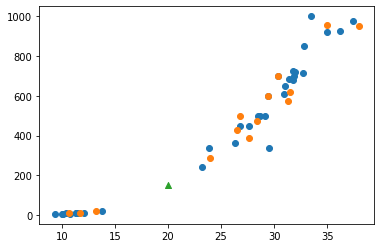

In [ ]:
import matplotlib.pyplot as plt 

plt.scatter(mixed_train_input[:,0],mixed_train_input[:,1])
plt.scatter(mixed_test_input[:,0],mixed_test_input[:,1])
plt.scatter(20,150,marker = '^')
plt.show()

In [ ]:
mixed_train_input[:,0]

array([11.5, 30.4, 31.4, 11.3, 31. , 32. , 11.3, 31.8, 13.8, 33.5, 10.4,
       30.9,  9.3, 10. , 28.7, 27.6, 32.8, 29.1, 23.9, 10.8, 11.4, 31.9,
       23.2, 35. , 26.8, 29.5, 29.4, 10.1, 31.8, 28.5, 36.2, 37.4, 32.7,
       12.1, 26.3])

### 스케일 

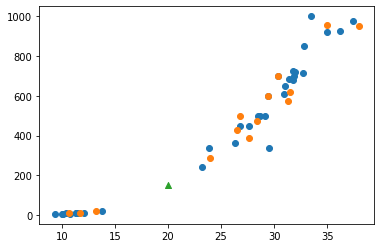

In [ ]:
import matplotlib.pyplot as plt 

plt.scatter(mixed_train_input[:,0],mixed_train_input[:,1])
plt.scatter(mixed_test_input[:,0],mixed_test_input[:,1])
plt.scatter(20,150,marker = '^')
plt.show()

In [ ]:
이 그래프를 보면 20,150의 데이터가 도미에 더 가까워 보이는데 결과는 빙어라고 나온다 왜그럴까?

In [ ]:
distance, indexes = kn.kneighbors([[21,150]])
print(distance, indexes)

[[ 92.02630059 130.29907905 138.08711019 138.12707917 140.33563339]] [[22  8 33  0  6]]


#### 표준화

In [ ]:
표준화를 할 때 train 데이터와 test 데이터의 표준화를 각각 진행 
하지만 test 데이터의 표준화를 할 때 mean 값은 train 데이터의 mean 값을 사용 

In [ ]:
mean=np.mean(train_input, axis=0)

In [ ]:
std=np.std(train_input, axis=0)

In [ ]:
print(mean,std)

In [ ]:
train_scaled=(train_input - mean)/std

In [ ]:
#train 데이터가 아니라 테스트 데이터 또는 검증을 할 경우 train 데이터의 mean 과 std 사용 
new=([21,150]-mean)/std


In [ ]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0],new[1],marker='*')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 오렌지로 연습 

In [ ]:
import numpy as np 

In [ ]:
orange = pd.read_csv('citrus.csv')

In [ ]:
orange.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [ ]:
#데이터 만들기
data = orange.iloc[:,1:3]
data.head()

,diameter,weight
0,2.96,86.76
1,3.91,88.05
2,4.42,95.17
3,4.47,95.60
4,4.48,95.76


In [ ]:
#믹싱
mix_index = np.arange(10000)
np.random.shuffle(mix_index)
mix_index

array([4143, 2358, 9152, ..., 2364, 8763, 5098])

In [ ]:
#믹싱한 인덱스 대로 정렬 
data = np.array(data)
mixed_data = data[mix_index]

In [ ]:
#믹싱한 것 확인 
print(data[4143], mixed_data[0])

[  9.65 170.97] [  9.65 170.97]


In [ ]:
#타겟 데이터 만들기 
orange.loc[orange['name'] == 'orange'] # 5천개
orange.loc[orange['name'] == 'grapefruit'] #5천개 

target_data = np.array([1]*5000 + [0]*5000)

In [ ]:
#타겟 데이터 믹싱하기 
target_data[mix_index]

#타겟 데이터 믹싱 확인 
print(target_data[4143], target_data[0])

1 1


In [ ]:
#트레이닝 데이터 자르기 
mixed_train_input = mixed_data[:8000,]
mixed_train_target = target_data[:8000,]
mixed_test_input = mixed_data[8000:,]
mixed_test_target = target_data[8000:,]

In [ ]:
#표준화 
mean=np.mean(mixed_train_input, axis=0) #평균 구하기 
std=np.std(mixed_train_input, axis=0)
train_scaled=(mixed_train_input - mean)/std

In [ ]:
print(mean,std)

[  9.97010375 174.97457125] [ 1.94088622 29.09892405]


In [ ]:
new=([21,150]-mean)/std

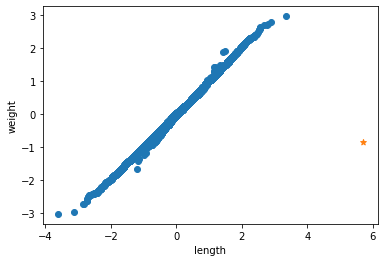

In [ ]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0],new[1],marker='*')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()